# 1. 자연어 처리 기초

1. 형태소를 분석한다.
2. 어휘 사전을 구축해 벡터화를 시킨다.

In [1]:
# 판다스 라이브러리 불러오기
import pandas as pd

In [2]:
# konlpy 설치 [LMS 에는 이미 설치가 되어 있습니다.]
#!pip install konlpy

In [3]:
# 라이브러리 불러오기 (okt)
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

In [4]:
# 토큰화 (형태소 단위)
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [5]:
# 토큰화 (명사만 추출)
tokenizer.nouns(text)

['탐험', '학교']

In [6]:
# 토큰화 (품사 태깅) 
tokenizer.pos(text)
# 언어 사전을 만든것

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

## CountVectorizer

**각 문장에서 단어 출현 횟수를 카운팅 하는 방법**
* BOW
* Bag Of Word

In [7]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [8]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(text)

In [9]:
# 데이터 학습
vect.fit(words)

CountVectorizer()

In [10]:
# 학습된 어휘
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [11]:
# 단어 사전
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [12]:
# 단어 사전 크기
len(vect.vocabulary_)

7

In [13]:
# 인코딩
df_t = vect.transform(words)

In [14]:
# 인코딩된 데이터 Matrix
df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]], dtype=int64)

In [15]:
# 어휘와 피처 ( 데이터 프레임 )
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [16]:
# test
test = "AI 공부하며 함께 성장해요!"

In [17]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(test)
words

['AI', '공부', '하며', '함께', '성장해요', '!']

In [18]:
# 인코딩된 데이터 
test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [19]:
# 어휘와 피처 ( 데이터 프레임 )
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


## TfidfVectorizer
**다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법**
* TF-IDF(Term Frequency - Inverse Document Frequency)

In [20]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
# tf-idf 활용 어휘 사전 구축
vect =TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [22]:
# 인코딩된 데이터 Matrix
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

# 2. 감성 분석
**문제정의 > EDA > 토큰화 > 어휘 사전 구축 > 인코딩 > 모델 학습 > 긍정 or 부정 판단하기**

## 데이터 불러오기
* 영화를 보고 감성분석을 해둔 데이터 셋

In [23]:
# 라이브러리 불러오기
import pandas as pd

In [24]:
# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

## EDA 및 데이터 전처리

In [25]:
# 데이터 샘플 확인
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [26]:
# 데이터 크기
df.shape

(150000, 3)

In [27]:
# 타겟 확인
df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

* 데이터 타겟 확인시 비율이 비슷한것을 확인했고, 비슷한 양의 데이터를 가지고 있다면 모델의 성능이 좋게 나올 확률이 높다.
* 편향이 높을수록 성능이 좋지 않게 나올 수 있다.

In [28]:
#결측치 확인하기
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [29]:
# 결측치 삭제
print(df.shape)
df = df.dropna()
print(df.shape)

(150000, 3)
(149995, 3)


In [30]:
# 피처 엔지니어링 ( 문장의 길이 )
df['len'] = df['document'].apply(len)

In [31]:
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<Axes: ylabel='Frequency'>

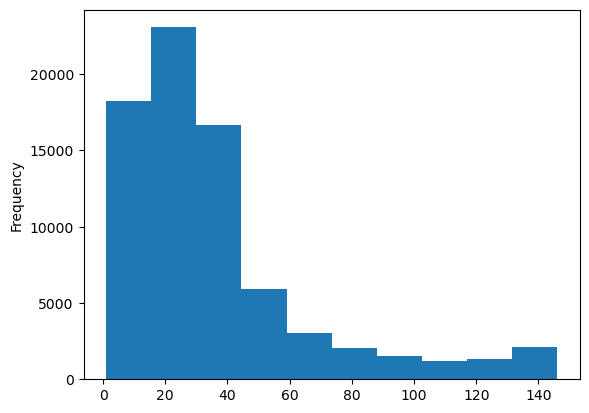

In [32]:
# len 시각화 (label == 0)
import matplotlib.pyplot as plt
df[df.label==0]['len'].plot(kind='hist')

<Axes: ylabel='Frequency'>

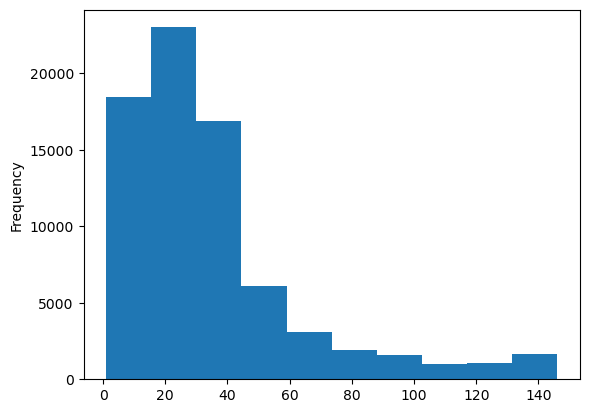

In [33]:
# len 시각화 (label == 1) 
df[df.label==1]['len'].plot(kind='hist')

In [34]:
# 데이터 샘플링 (데이터가 너무 크기 때문에 1000개만 추출하여 샘플로 만들어서 진행)
df = df[:1000]

In [35]:
# 토큰화
vect = CountVectorizer(tokenizer=tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

C:\Users\nini\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## 머신러닝
**교차검증**    
    
**[리마인드] 교차검증이란?**
일반적으로 모델을 학습시킬 때 데이터를 train set과 test set으로 나누어 train set을 가지고 학습을 수행합니다.    
교차검증이란 여기서 train set을 다시 train set과 validation set으로 나누어 학습 중 검증과 수정을 수행하는 것을 의미합니다.  
    
**[리마인드] F1 이란?**    
분류 모델의 평가 지표 중 하나로, 정밀도(precision)와 재현율(recall)의 조화평균을 나타냅니다.    
<참고> 5. 지도학습(분류) 노드의 5-5. 교차검증, 5-6. 평가(분류) 스텝에서 복습하실 수 있습니다.    

In [36]:
# 머신러닝 > 교차검증 (f1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean() 

0.6634352457852256

# 3. 자연어 전처리

**어휘 사전 구축**    
* 00% 이상 나타나는 단어 무시    
* 최소 N개의 문장에만 나타나는 단어만 유지    
    
**불용어 (stopword)**    
* 큰 의미가 없는 단어    
* 예를들어 을, 는, 이, 가, 여기, 저기     
    
**띄어쓰기**    
* 한국어는 띄어쓰기가 중요함
  
**반복되는 글자 정리**    
* 리뷰나 댓글에서 ㅋㅋㅋ나 ㅎㅎㅎ처럼 반복되는 글자들의 처리
     
**맞춤법 검사**   
* 맞춤법을 틀리는 경우 검사 정리

## 어휘 사전 구축

In [37]:
# 토큰화 (max_df) N개 보다 큰 단어 수 무시
vect = CountVectorizer(tokenizer=tokenizer.morphs, max_df=10) #10번이상 등장하는 값은 제외하라는 뜻
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

C:\Users\nini\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.643

In [38]:
# 토큰화(min_df) N개 보다 작은 단어 수 무시
vect = CountVectorizer(tokenizer=tokenizer.morphs, min_df=2) # 2번이하로 등장하는 값을 무시
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

C:\Users\nini\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.689

## 불용어

In [39]:
# stop_words
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
stop_words = ['하며','ai']
vect = CountVectorizer(stop_words=stop_words)
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 4, '탐험': 2, '성장하는': 1, '학교': 3, 'aiffel': 0}

## 띄어쓰기
* 더 자세히 :https://github.com/haven-jeon/PyKoSpacing

In [40]:
# git 설치 확인
!git --version

git version 2.49.0.windows.1


In [41]:
# Spacing 설치
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to c:\users\nini\appdata\local\temp\pip-req-build-zj03ihbm
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit b32a889cbd10b006d2f4aba118f0cd5b677e2979
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git 'C:\Users\nini\AppData\Local\Temp\pip-req-build-zj03ihbm'


In [42]:
# 띄어쓰기
from pykospacing import Spacing
spacing = Spacing()

text = "함께탐험하며성장하는AI학교아이펠"
spacing_test = spacing(text) 
print(text)
print(spacing_test)

함께탐험하며성장하는AI학교아이펠
함께 탐험하며 성장하는 AI 학교 아이펠


## 반복되는 글자 처리
* 더 자세히 : https://github.com/lovit/soynlp

In [43]:
# soynlp 설치
!pip install soynlp

In [44]:
# 댓글 데이터에 등장하는 반복되는 이모티콘의 정리
from soynlp.normalizer import *

emoticon_normalize('하하하하ㅋㅋㅋㅋㅋㅠㅠㅠㅠㅠㅠ', num_repeats=3)

'하하하ㅋㅋㅋㅠㅠㅠ'

## 맞춤법 검사기
* 더 자세히: https://github.com/ssut/py-hanspell

In [45]:
# py-hanspell 설치
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to c:\users\nini\appdata\local\temp\pip-req-build-1y9z5ae_
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git 'C:\Users\nini\AppData\Local\Temp\pip-req-build-1y9z5ae_'


In [47]:
# 맞춤법 검사
from hanspell import spell_checker
text = '알파고 이전, 2015년부터 만들 어진 최초의AI 커뮤니티 모두의연구소.학연, 지연, 모두연이라는 말이나올만큼 AI의 보금자리로서 중요한 역할을 하고있는 모두의연구소에서 만들었습니다. AI기술을 커뮤니티로 배우는 유일 한 기관 아이펠과 함께 밝은 미래를 만들어보세요.'
result = spell_checker.check(text)
result.as_dict()

{'result': True,
 'original': '알파고 이전, 2015년부터 만들 어진 최초의AI 커뮤니티 모두의연구소.학연, 지연, 모두연이라는 말이나올만큼 AI의 보금자리로서 중요한 역할을 하고있는 모두의연구소에서 만들었습니다. AI기술을 커뮤니티로 배우는 유일 한 기관 아이펠과 함께 밝은 미래를 만들어보세요.',
 'checked': '알파고 이전, 2015년부터 만들어진 최초의 AI 커뮤니티 모두의 연구소. 학연, 지연, 모두 연이라는 말이 나올 만큼 AI의 보금자리로서 중요한 역할을 하고 있는 모두의 연구소에서 만들었습니다. AI 기술을 커뮤니티로 배우는 유일한 기관 아이펠과 함께 밝은 미래를 만들어보세요.',
 'errors': 9,
 'words': OrderedDict([('알파고', 0),
              ('이전,', 0),
              ('2015년부터', 0),
              ('만들어진', 2),
              ('최초의', 2),
              ('AI', 2),
              ('커뮤니티', 0),
              ('모두의', 2),
              ('연구소.', 2),
              ('학연,', 2),
              ('지연,', 0),
              ('모두', 2),
              ('연이라는', 2),
              ('말이', 2),
              ('나올', 2),
              ('만큼', 2),
              ('AI의', 0),
              ('보금자리로서', 0),
              ('중요한', 0),
              ('역할을', 0),
              ('하고', 2),
              ('있는', 2),
              ('연구소에서', 2),
              ('만들

In [48]:
# 수정된 문장
result.checked

'알파고 이전, 2015년부터 만들어진 최초의 AI 커뮤니티 모두의 연구소. 학연, 지연, 모두 연이라는 말이 나올 만큼 AI의 보금자리로서 중요한 역할을 하고 있는 모두의 연구소에서 만들었습니다. AI 기술을 커뮤니티로 배우는 유일한 기관 아이펠과 함께 밝은 미래를 만들어보세요.'

###  hanspell 오류 수정하기
1. 네이버 맞춤법 검사기에서 F12로 개발자 모드 켠다
2. 상당 Network 탭에서 하단에 payload 들어간후 Speller를 눌러서 여기에서 passportKey와 _: 이 두 개의 값을 확인한다.
3. 파일 수정을 위한 설치된 라이브러리의 경로 확인 및 .py 파일 수정을 한다.
   * 코드
     import hanspell
     print(hanspell.__file__)

     
**수정된 예 :**
    payload = {    
        'passportKey' : 'c9a2c043b06f9a113603bccb0486edbe0c2b223f',     
        'q': text,    
        'where' : 'nexearch',     
        'color_blindness' : '0',    
        '_': '1747728271705',    
            
    }
